## Value Iteration Exercise

**Solve the following MDP problem using value iteration:**

A robot performs picking and packaging task in a warehouse, while “picking” is to gather required items from different locations of the warehouse and “packaging” is to bring those items to a specific location where they can be packaged. In this problem, the robot will need to find out the shortest path between picking location and packaging location through different algorithms.

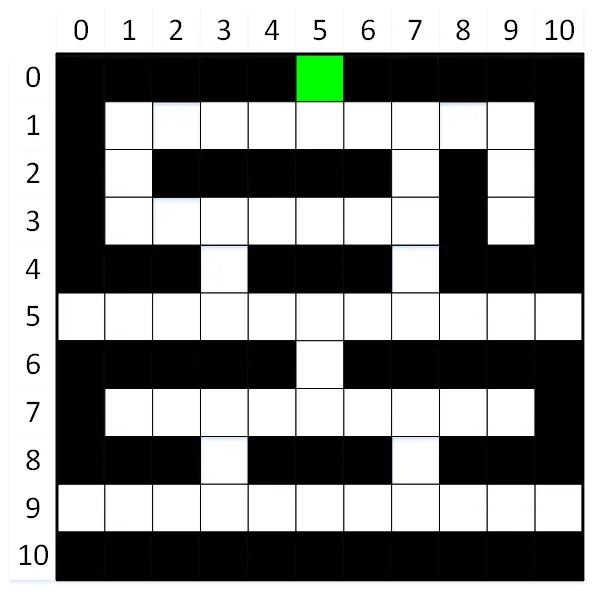

This is a grid world problem and its environment includes states, actions and rewards.

**State:** All possible locations within warehouse. Some locations are storing shelves (black squares), and other locations are aisles that are picking locations and can be used to travel; there is one location (green square) and it represents the item packaging location, the goal of the robot. There are total of 11 x 11 = 121 possible states, and each state can be identified by its row and column index. The storing shelves and packaging location are terminal states.

**Actions:** Available direction that a robot agent can move, it consists of Up, Right, Down and Left. A robot must learn to avoid hitting the storage locations.

**Rewards:** Each state used for travelling is assigned a small punishment of 1 (reward of -1), and each state of the storage location is assigned a big punishment of 100 (reward of -100). Finally, the packaging location is assigned a big reward value of 100. A robot must learn to travel through the shortest path and avoid driving into storing shelves in order to minimize punishment, ie. maximize rewards.

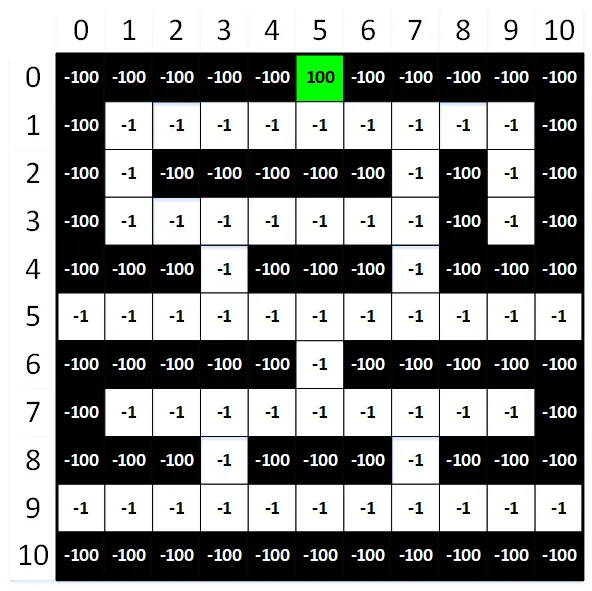

                   Reward Assigned to Each State

In value iteration algorithm, we can set the convergence tolerance to 0.01 for each state, ie. stop looping when the utility value difference between current iteration and previous iteration is less than 0.01 at each state. It took 27 iterations to converge and the result returned the direction at each state a robot should head to. Below figure shows the optimal policy output from the program, where at each aisle location, 0, 1, 2 and 3 denotes to move up, right, down and left, respectively. It was then converted to a clearer policy map:

In [29]:

"""
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 1. 1. 1. 1. 0. 3. 3. 3. 3. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 3. 1. 1. 1. 1. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [1. 1. 1. 1. 1. 1. 1. 0. 3. 3. 3.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 1. 1. 1. 1. 0. 3. 3. 3. 3. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [1. 1. 1. 0. 3. 1. 1. 0. 3. 3. 3.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
"""

'\n [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  \n [0. 1. 1. 1. 1. 0. 3. 3. 3. 3. 0.]  \n [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  \n [0. 0. 3. 1. 1. 1. 1. 0. 0. 0. 0.]  \n [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  \n [1. 1. 1. 1. 1. 1. 1. 0. 3. 3. 3.]  \n [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  \n [0. 1. 1. 1. 1. 0. 3. 3. 3. 3. 0.]  \n [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  \n [1. 1. 1. 0. 3. 1. 1. 0. 3. 3. 3.]  \n [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]\n'

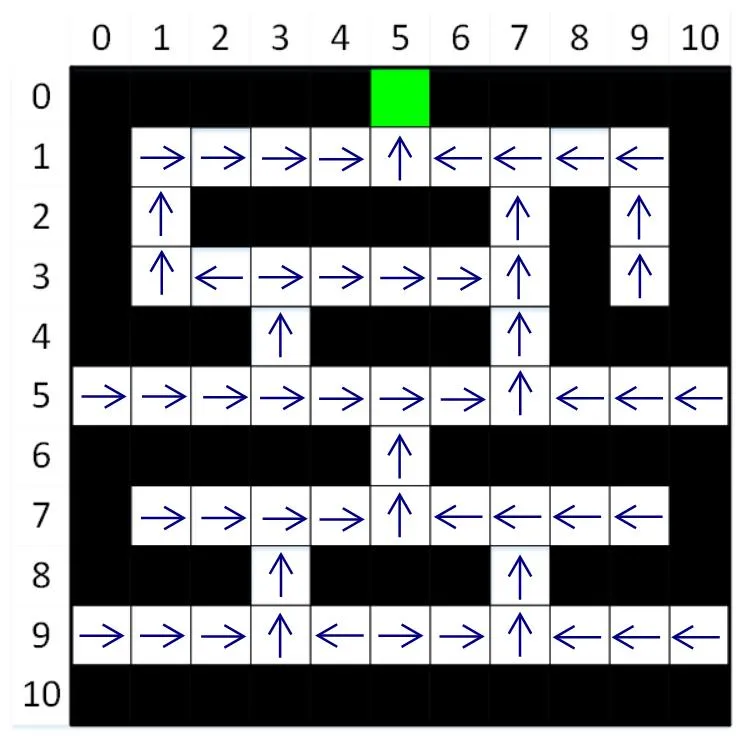  
                        
                         Policy Map (Direction Map)

The key equation to reinforcement is Bellman Equation and it fully encodes the utility/value of a state in a Markov Decision Process. Value iteration and policy iteration are the two basic methods of solving Bellman Equation and thus computing an optimal Markov Decision Process. Here we will use value iteration to solve an MDP problem — warehouse problem.

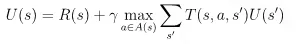

        Bellman equation

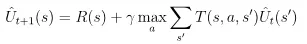

    Equation in Value Iteration

In [30]:
import numpy as np

environment_rows = 11
environment_columns = 11
actions = ['up', 'right', 'down', 'left']

In [31]:
# Create 2D array to hold rewards for each state

rewards = np.full((environment_rows, environment_columns), -100.)
rewards[0, 5] = 100.

aisles = {} 
aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 8)]
aisles[3].append(9)
aisles[4] = [3, 7]
aisles[5] = [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(11)]

for row_index in range(1, 10):
    for column_index in aisles[row_index]:
        rewards[row_index, column_index] = -1
        
print('Rewards for each state:')
for row in rewards:
    print(row)

Rewards for each state:
[-100. -100. -100. -100. -100.  100. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.]


In [32]:
# initialize V value at each state
V = np.zeros((environment_rows, environment_columns,1))
V [:,:,0] = rewards

In [33]:
# Print initialized values V
print(V[:,:,0])

[[-100. -100. -100. -100. -100.  100. -100. -100. -100. -100. -100.]
 [-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
 [-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
 [-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.   -1. -100.]
 [-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
 [  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.]
 [-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100. -100.]
 [-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
 [-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
 [  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.]
 [-100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.]]


In [34]:
# initialize policy at each state
optimal_policy = np.zeros((environment_rows, environment_columns,1))

In [35]:
#define a function that determines if the specified location is a terminal state
def is_terminal_state(current_row_index, current_column_index):
    if rewards[current_row_index, current_column_index] == -1.:
        return False
    else:
        return True

In [36]:
#define a function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if actions[action_index] == 'up' and current_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
        new_column_index += 1
    elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index

In [37]:
epsilon = 0.9 # percentage of time to take the best action (instead of a random action)
pr_best = epsilon + (1-epsilon)/4 # probability of moving to the best adjacent location
pr_others = (1-epsilon)/4 # probability of moving to the adjacent locations other than the best
gamma = 0.9 # discount factor

In [38]:
# Implementing value iteration using the following method

def value_iterations(V):
    number_iterations = 0
    while True:
        # Store current values of states
        oldV = V.copy()
        # Iterating and updating value and optimal policy of each state
        for row_index in range(0,11):
            for column_index in range(0,11):
                if not is_terminal_state(row_index, column_index):
                    Q = {}
                    # Finding value of taking each action a in current state s = (row_index, column_index) and store it in Q 
                    for a in range(0,4):
                        new_row_index, new_column_index = get_next_location(row_index, column_index, a)
                        direction_index = np.array([0,1,2,3])
                        other_direction_index = np.delete(direction_index, np.where(direction_index == a))
                        other_row_index_1, other_column_index_1 = get_next_location(row_index, column_index, other_direction_index[0])
                        other_row_index_2, other_column_index_2 = get_next_location(row_index, column_index, other_direction_index[1])
                        other_row_index_3, other_column_index_3 = get_next_location(row_index, column_index, other_direction_index[2])
                        Q[a] = rewards[row_index, column_index] + gamma * (
                            pr_best * oldV[new_row_index, new_column_index, 0] +
                            pr_others * oldV[other_row_index_1, other_column_index_1, 0] +
                            pr_others * oldV[other_row_index_2, other_column_index_2, 0] +
                            pr_others * oldV[other_row_index_3, other_column_index_3, 0]
                        )
                    optimal_action = max(Q, key=Q.get)
                    V[row_index, column_index, 0] = Q[optimal_action]
                    optimal_policy[row_index, column_index, 0] = optimal_action 

        number_iterations = number_iterations + 1
        if (abs(oldV[:,:,0] - V[:,:,0])<0.01).all():
            break        
    return V, optimal_policy, number_iterations

In [39]:
# Obtain optimal value and policy 
V, optimal_policy, number_iterations = value_iterations(V)

In [40]:
# Print optimal policy and number of iterations
optimal_policy = optimal_policy[:,:,0]
print('Optimal policy:')
print(optimal_policy)
print("")
print('Iterations:')
print(number_iterations)

Optimal policy:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 3. 3. 3. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 3. 3. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 3. 3. 3. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 3. 1. 1. 0. 3. 3. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Iterations:
27
